# Skills Assessment
<center><font size = 3> Marisa Macias </font></center>

<h2>Data Set 1</h2>

1)  Consider data set 1 (ds1.csv). The data set comprises features (the Five xs) along with three sequences that may or may not be generated from the features (3 ys).

a) Describe the data set in a few sentences.  E.g.   What are the distributions of each feature?  Summary statistics?

b) Try to come up with a predictive model, e.g.  y = f(x_1 , … , x_n) for each y sequence.   Describe your model and how you came up with them.   What (if any) are the predictive variables?  How good would you say each of your models is?

<h2>Data Set 2</h2>

2) Consider data set 2 (ds2.csv).  The data asset comprises a set of observations.

a) Describe the data set in a few sentences.

b) How would you visualize this data set?  Can you make an interesting visualization?

c) Someone suggests that the observations are really from multiple different files and were accidentally joined into one larger data set.  Does anything about the data set suggest this?  If so, how many different sources/file do you think there are?

d) Bonus points:  If you think there are more than one source in ds2, can you assign each observation to the right source (based on the number of sources you identified in 2c)?


<h2>Table of Contents</h2>
* [Data Set 1](#D1)
    * [Question 1a](#d1qa)
    * [Predictive modeling](#d1qb)
    * [Q1 Summary](#q1s)
* [Data Set 2](#D2)
    * [Describe](#d2qa)
    * [Visualize](#d2qb)
    * [Multiple Sources](#d2qb)
    * [Group Membership](#d2qb)    
    * [Q2 Summary](#q2s)

In [4]:
# general purpose data manipulation and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.facecolor'] = 'white'

%matplotlib inline

# dimensionality reduction and visualization
from sklearn.decomposition import PCA

# data cleaning, processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.cluster import KMeans
import mglearn

# tests
from scipy import stats
import statsmodels.api as sm
from sklearn import metrics

from scipy.stats import ks_2samp

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

<h2>Data Set One</h2> <a class="anchor" id="d1qa"></a>
The first dataset is a single file of continuous variables.

In [13]:
d1 = pd.read_csv('data set 1.csv')

In [14]:
d1.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x5            float64
x6            float64
ya            float64
yb            float64
yc            float64
dtype: object

In [15]:
d1.shape[0]

100000

In [16]:
d1.rename(columns={'Unnamed: 0':'id'}, inplace=True)
variables_df = d1.drop(['id','ya','yb','yc'], axis=1)
targets_df = d1.drop(['id','x1','x2','x3', 'x5','x6'], axis=1)
target_ya = d1['ya']
target_yb = d1['yb']
target_yc = d1['yc']

In [17]:
variables_df.describe()

,x1,x2,x3,x5,x6
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.011059,-3.005565,2.500593,0.999136,0.000647
std,2.873568,2.000799,1.752906,1.002006,4.663860
min,0.000015,-12.498524,-3.489212,0.000003,-13.885453
25%,2.536309,-4.353844,1.189920,0.285629,-2.611943
50%,5.022191,-3.002649,2.503764,0.690903,-0.000611
75%,7.486275,-1.649283,3.802236,1.386862,2.621841
max,9.999887,6.089820,8.679097,15.102966,13.924740


[(-15, 15)]

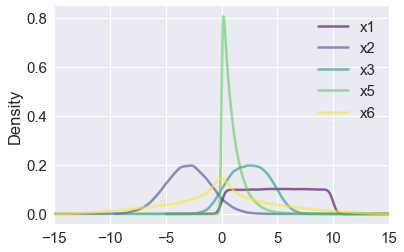

In [18]:
variables_df.plot(kind = 'kde', alpha = 0.6, cmap = "viridis").set(xlim=(-15, 15))

In [19]:
targets_df.describe()

,ya,yb,yc
count,100000.000000,100000.000000,1.000000e+05
mean,3.827867,2.111854,1.022765e-04
std,18.438514,0.769306,3.121215e-02
min,-64.021995,-0.523672,-5.433613e-01
25%,-8.998020,1.580212,-2.423158e-03
50%,2.666992,2.231057,-5.670000e-10
75%,15.579687,2.733318,2.476745e-03
max,107.713997,3.841363,8.183882e-01


As you can see in the above tables and figures, the features are five continuous variables between negative fourteen and sixteen. The last feature, x6, has a much larger standard deviation as well as the smallest minimum and one of the largest maximums. The majority of values fall between negative five and postive five, and the means are within those bounds as well. x1 has no negative values, which explains it's higher mean. X5 is leptokurtic while x1 and x6 are more playkurtic.

## Predictive Modeling <a class="anchor" id="d1qb"></a>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(variables_df, target_ya, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     ya   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                 3.016e+04
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:14:55   Log-Likelihood:            -2.8523e+05
No. Observations:               75000   AIC:                         5.705e+05
Df Residuals:                   74995   BIC:                         5.705e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.1577      0.022    140.758      0.0

In [26]:
lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

10.4624552112


In [27]:
variables_t = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(variables_df)
poly_df = pd.DataFrame(variables_t)
poly_df.columns = ['x1', 'x2', 'x3', 'x5', 'x6','x1:x2','x1:x3', 'x1:x5', 'x1:x6',
                   'x2:x3','x2:x5','x2:x6','x3:x5', 'x3:x6', 'x5:x6']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(poly_df, target_ya, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     ya   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                 1.254e+04
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:24:31   Log-Likelihood:            -2.7950e+05
No. Observations:               75000   AIC:                         5.590e+05
Df Residuals:                   74985   BIC:                         5.592e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.8654      0.042     92.086      0.0

In [36]:
poly_yad = poly_df.drop(['x1:x5'], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(poly_yad, target_ya, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     ya   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                 1.343e+04
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:26:49   Log-Likelihood:            -2.7950e+05
No. Observations:               75000   AIC:                         5.590e+05
Df Residuals:                   74986   BIC:                         5.591e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.8644      0.038    100.580      0.0

In [38]:
poly_yad = poly_yad.drop(['x2:x3'], axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(poly_yad, target_ya, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     ya   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                 1.447e+04
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:26:56   Log-Likelihood:            -2.7950e+05
No. Observations:               75000   AIC:                         5.590e+05
Df Residuals:                   74987   BIC:                         5.591e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.8599      0.027    144.433      0.0

In [40]:
poly_yad = poly_yad.drop(['x1:x6'], axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(poly_yad, target_ya, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     ya   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                 1.567e+04
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:27:12   Log-Likelihood:            -2.7950e+05
No. Observations:               75000   AIC:                         5.590e+05
Df Residuals:                   74988   BIC:                         5.591e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.8600      0.027    144.436      0.0

In [42]:
poly_yad = poly_yad.drop(['x3:x6'], axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(poly_yad, target_ya, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     ya   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                 1.710e+04
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:27:33   Log-Likelihood:            -2.7950e+05
No. Observations:               75000   AIC:                         5.590e+05
Df Residuals:                   74989   BIC:                         5.591e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.8599      0.027    144.436      0.0

In [44]:
poly_yad = poly_yad.drop(['x5:x6'], axis=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(poly_yad, target_ya, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     ya   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                 1.881e+04
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:28:09   Log-Likelihood:            -2.7950e+05
No. Observations:               75000   AIC:                         5.590e+05
Df Residuals:                   74990   BIC:                         5.591e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.8599      0.027    144.435      0.0

In [46]:
poly_yad = poly_yad.drop(['x2:x6'], axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(poly_yad, target_ya, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     ya   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                 2.090e+04
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:29:52   Log-Likelihood:            -2.7950e+05
No. Observations:               75000   AIC:                         5.590e+05
Df Residuals:                   74991   BIC:                         5.591e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.8598      0.027    144.432      0.0

In [48]:
poly_yad = poly_yad.drop(['x6'], axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(poly_yad, target_ya, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     ya   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                 2.351e+04
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:30:39   Log-Likelihood:            -2.7950e+05
No. Observations:               75000   AIC:                         5.590e+05
Df Residuals:                   74992   BIC:                         5.591e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.8598      0.027    144.430      0.0

In [50]:
poly_yad = poly_yad.drop(['x3:x5'], axis=1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(poly_yad, target_ya, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     ya   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                 3.134e+04
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:34:24   Log-Likelihood:            -2.7950e+05
No. Observations:               75000   AIC:                         5.590e+05
Df Residuals:                   74994   BIC:                         5.591e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.8865      0.024    161.169      0.0

In [52]:
poly_yad = poly_yad.drop(['x2:x5'], axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(poly_yad, target_ya, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     ya   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                 3.134e+04
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:31:45   Log-Likelihood:            -2.7950e+05
No. Observations:               75000   AIC:                         5.590e+05
Df Residuals:                   74994   BIC:                         5.591e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.8865      0.024    161.169      0.0

In [55]:
lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

10.016694502


In [60]:
X_train, X_test, y_train, y_test = train_test_split(variables_df, target_yb, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yb   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 4.607e+05
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:35:17   Log-Likelihood:                -37564.
No. Observations:               75000   AIC:                         7.514e+04
Df Residuals:                   74995   BIC:                         7.518e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3251      0.001    393.743      0.0

In [61]:
lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.249712377267


In [62]:
X_train, X_test, y_train, y_test = train_test_split(poly_df, target_yb, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yb   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.556e+05
Date:                Tue, 21 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:35:39   Log-Likelihood:                -6753.6
No. Observations:               75000   AIC:                         1.354e+04
Df Residuals:                   74985   BIC:                         1.368e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4123      0.001    372.839      0.0

In [64]:
poly_yb = poly_df.drop(['x5:x6'], axis=1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(poly_yb, target_yb, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yb   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.810e+05
Date:                Wed, 22 Nov 2017   Prob (F-statistic):               0.00
Time:                        12:43:36   Log-Likelihood:                -6753.6
No. Observations:               75000   AIC:                         1.354e+04
Df Residuals:                   74986   BIC:                         1.366e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4123      0.001    372.844      0.0

In [66]:
poly_yb = poly_yb.drop(['x1:x6'], axis=1)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(poly_yb, target_yb, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yb   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 4.103e+05
Date:                Wed, 22 Nov 2017   Prob (F-statistic):               0.00
Time:                        12:44:00   Log-Likelihood:                -6753.6
No. Observations:               75000   AIC:                         1.353e+04
Df Residuals:                   74987   BIC:                         1.365e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4123      0.001    372.848      0.0

In [69]:
poly_yb = poly_yb.drop(['x2:x3'], axis=1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(poly_yb, target_yb, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yb   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 4.445e+05
Date:                Wed, 22 Nov 2017   Prob (F-statistic):               0.00
Time:                        12:45:23   Log-Likelihood:                -6753.9
No. Observations:               75000   AIC:                         1.353e+04
Df Residuals:                   74988   BIC:                         1.364e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4128      0.001    495.302      0.0

In [71]:
poly_yb = poly_yb.drop(['x3:x5'], axis=1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(poly_yb, target_yb, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yb   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 4.849e+05
Date:                Wed, 22 Nov 2017   Prob (F-statistic):               0.00
Time:                        12:45:42   Log-Likelihood:                -6754.1
No. Observations:               75000   AIC:                         1.353e+04
Df Residuals:                   74989   BIC:                         1.363e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4125      0.001    606.690      0.0

In [73]:
poly_yb = poly_yb.drop(['x3:x6'], axis=1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(poly_yb, target_yb, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yb   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 5.334e+05
Date:                Wed, 22 Nov 2017   Prob (F-statistic):               0.00
Time:                        12:45:59   Log-Likelihood:                -6754.3
No. Observations:               75000   AIC:                         1.353e+04
Df Residuals:                   74990   BIC:                         1.362e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4125      0.001    606.692      0.0

In [75]:
poly_yb = poly_yb.drop(['x2:x6'], axis=1)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(poly_yb, target_yb, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yb   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 5.927e+05
Date:                Wed, 22 Nov 2017   Prob (F-statistic):               0.00
Time:                        12:46:20   Log-Likelihood:                -6754.7
No. Observations:               75000   AIC:                         1.353e+04
Df Residuals:                   74991   BIC:                         1.361e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4125      0.001    606.692      0.0

In [77]:
poly_yb = poly_yb.drop(['x6'], axis=1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(poly_yb, target_yb, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yb   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 6.668e+05
Date:                Wed, 22 Nov 2017   Prob (F-statistic):               0.00
Time:                        12:46:38   Log-Likelihood:                -6755.6
No. Observations:               75000   AIC:                         1.353e+04
Df Residuals:                   74992   BIC:                         1.360e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4125      0.001    606.688      0.0

In [79]:
lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.225900589942


In [80]:
X_train, X_test, y_train, y_test = train_test_split(variables_df, target_yc, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.180
Date:                Wed, 22 Nov 2017   Prob (F-statistic):              0.316
Time:                        12:48:38   Log-Likelihood:             1.5366e+05
No. Observations:               75000   AIC:                        -3.073e+05
Df Residuals:                   74995   BIC:                        -3.073e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          7.248e-05   6.45e-05      1.124      0.2

In [82]:
lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.0312813167637


In [59]:
X_train, X_test, y_train, y_test = train_test_split(variables_df, target_yc, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.180
Date:                Mon, 20 Nov 2017   Prob (F-statistic):              0.316
Time:                        22:05:40   Log-Likelihood:             1.5366e+05
No. Observations:               75000   AIC:                        -3.073e+05
Df Residuals:                   74995   BIC:                        -3.073e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          7.248e-05   6.45e-05      1.124      0.2

In [83]:
lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.0312813167637


In [61]:
X_train, X_test, y_train, y_test = train_test_split(poly_df, target_yc, random_state = 42)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.363
Date:                Mon, 20 Nov 2017   Prob (F-statistic):              0.155
Time:                        22:05:42   Log-Likelihood:             1.5366e+05
No. Observations:               75000   AIC:                        -3.073e+05
Df Residuals:                   74985   BIC:                        -3.072e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0001      0.000      0.959      0.3

In [62]:
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.0312797922305


| Target | Standard RMSE | Interaction RMSE | Standard R-squared | Interaction R-squared |
| -- | -- | -- | -- |  -- |
| ya | 10.462 | 10.017| 0.668 | 0.715 |
| yb | 0.250 | 0.226 | 0.968 | 0.986 |
| yc | 0.031 | 0.031 | 0.000 | 0.000 |


## Question One Summary <a class="anchor" id="q1s"></a>

ya = 3.8865(x1) + 3.4861(x2) + 0.314(x3) + 0.0715(x5) + 0.5371(x1)(x2) + 0.1194(x1)(x3)

yb = 0.4125(x1) + -0.1093(x2) + 0.1663(x3) + 0.1797(x5) + 0.0133(x1)(x2) + -0.0335(x1)(x3) + -0.0175(x1)(x5) +  0.0207(x2)(x5)

yc does not seem to be depenendent on the x features.

I ran three separate multiple regressions to explore the relationships between the features and the three sets of target variables. I found that the first two, ya and yb, did have predictive relationships while the third, yc, did not. In the case of the first two relationships, both were slightly improved by incorporating feature interactions. I determined the quality of the relationships based on the R-squared (how well the data fits the line) as well as the reduced mean standard error of the predicted versus true y values from the test set.

For both ya and yb, there were some shared features which were not predictive. Of the original features, x6 did not significantly contribute to the model. None of the interactions features including x6 significantly contributed to the model either. Features that did contribute to both models include
x1, x2, x3, x5, x1:x2, x1:x3

For the yb model, the interactions between x1:x5 and x2:x5 also signficantly contributed to the model.

The yb model with interactions is clearly the best, with lowest RMSE and the highest R squared. The ya model with interactions is next best, and the yc model was not signfiicant at all.

## Data Set Two<a class="anchor" id="D2"></a>

In [84]:
d2 = pd.read_csv('Data set 2.csv')
d2.rename(columns={'Unnamed: 0':'id'}, inplace=True)
variables_df2 = d2.drop(['id'], axis=1)

In [85]:
variables_df2.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,8.677829,11.716801,9.252817,-2.679634,2.774942,0.077631,8.200884,8.712878,-12.860135,-1.339360
std,11.971827,6.655333,9.861443,10.625164,8.800553,15.375478,10.426023,9.881482,8.881026,14.534143
min,-25.824199,-8.497562,-23.666439,-29.429655,-22.033329,-35.264019,-21.428538,-16.811146,-36.065150,-36.468083
25%,0.231327,7.161564,2.648845,-10.652694,-4.098043,-14.003670,-0.812888,1.480706,-19.430697,-13.216190
50%,12.754335,11.896021,11.422441,-2.631318,2.484416,1.500838,8.532535,9.628064,-14.417786,-2.094310
75%,17.364337,16.279210,16.503676,5.340314,9.660898,14.050512,17.138898,16.081044,-6.534142,10.561797
max,32.268570,32.909917,31.230550,26.422798,29.312010,31.727042,32.084297,36.847922,13.553705,32.641789


<h2>Describe</h2> <a class="anchor" id="d2qa"></a>
The dataset is ten features of continuous data. The features of this dataset range between approximately -35 and 35. The features have very different means, ranging from approximately -12 to 12. X2 and x3 have the highest means, and x9 has by far the lowest mean. The features generally have a standard deviation around 10. 

<h2>Visualize</h2> <a class="anchor" id="d2qb"></a>

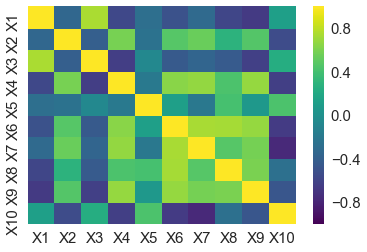

In [135]:
variables_df2 = d2.drop(['id'], axis=1)
sns.heatmap(variables_df2.corr(), cmap="viridis")

This correlation matrix allows the viewer to visualize the correlations between the features. The bright yellow and light green indicate close correlations - it appears that features 2, 4, 6, 7, 8, and 9 all have relatively strong correlations with each other. It also appears that features 1, 3, and 5 have relatively strong correlations. From this, I would anticipate that this data would stand up well to dimension reduction.

[(-50, 40)]

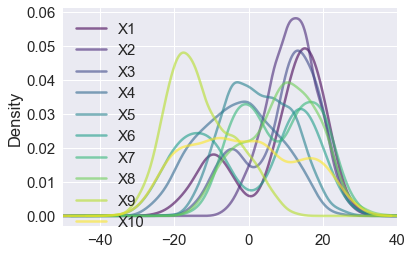

In [145]:
variables_df2.plot(kind = 'kde', alpha = 0.6, cmap = "viridis").set(xlim=(-50, 40))

This density plot shows the distribution of values for each feature, and the relative quantity of cases for that any given value. It gives an overall sense of the variables relative to each other, in terms of the range and median values for the features.

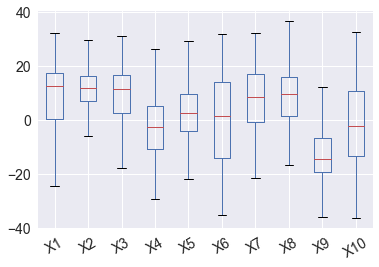

In [146]:
variables_df2.boxplot(fontsize=14, rot=30)

This boxplot shows the distribution of values for each feature, focusing on the mean and quartiles. It gives an overall sense of the variables relative to each other in a way that the other plot does not. The plot shows that the median is closer to the third quartile than the first quartile, and closer to maximum than the minimum for x1 and x3, suggest a left skew. The opposite seems the be true for x9 - the median is closer to the first quartile, and marginally closer to the minimum.

<h2>Multiple Sources</h2> <a class="anchor" id="d2qc"></a>

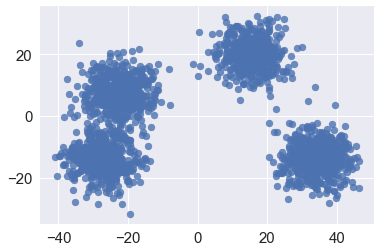

In [88]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(variables_df2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)

A Pricipal Components analysis is a decomposition and dimension reduction technique that comprises substantial aspects of the variation of the dataset. I chose two dimensions based on my earlier observations that there seemed to be generally two groupings of correlations. This technique makes no assumptions about group membership. I see potentially three or four distinct groups. To me this suggests that the data is composed of likely three or four distinct datasets that were combined, or came from three or four different sources. I will investigate.

In [89]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(variables_df2)
y_kmeans2 = kmeans2.predict(variables_df2)
labels2 = kmeans2.labels_
print metrics.silhouette_score(variables_df2, labels2, metric='euclidean')
print metrics.calinski_harabaz_score(variables_df2, labels2)

0.460575907769
2148.47408204


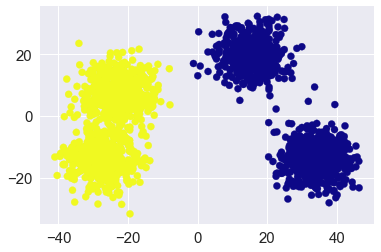

In [90]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans2, s=50, cmap='plasma')

In [91]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(variables_df2)
y_kmeans3 = kmeans3.predict(variables_df2)
labels3 = kmeans3.labels_
print metrics.silhouette_score(variables_df2, labels3, metric='euclidean')
print metrics.calinski_harabaz_score(variables_df2, labels3)

0.47777997955
2206.21413667


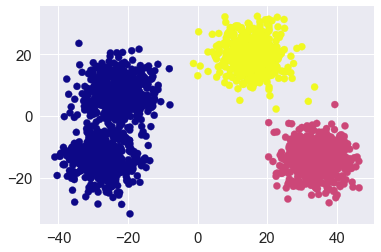

In [92]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans3, s=50, cmap='plasma')

In [93]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(variables_df2)
y_kmeans4 = kmeans4.predict(variables_df2)
labels4 = kmeans4.labels_
print metrics.silhouette_score(variables_df2, labels4, metric='euclidean')
print metrics.calinski_harabaz_score(variables_df2, labels4)

0.468583058019
2541.1388031


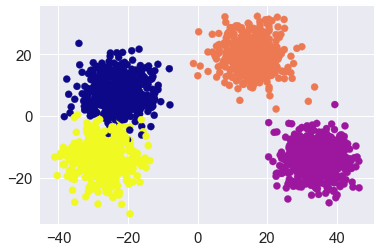

In [94]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans4, s=50, cmap='plasma')

In [95]:
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(variables_df2)
y_kmeans5 = kmeans5.predict(variables_df2)
labels5 = kmeans5.labels_
print metrics.silhouette_score(variables_df2, labels5, metric='euclidean')
print metrics.calinski_harabaz_score(variables_df2, labels5)

0.378647500102
1958.38928762


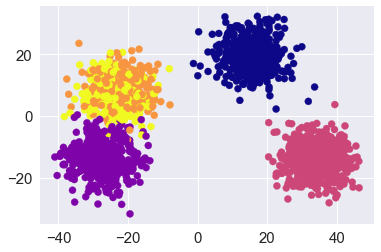

In [96]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans5, s=50, cmap='plasma')

| N-clusters | Silhouette score | Calinski-Harabaz score |
| -- | -- | -- |
| 2 | 0.461 | 2148|
| 3 | 0.478 | 2206 |
| 4 | 0.469 | 2541 |
| 5 | 0.353 | 1958 |


<h2>Group Membership</h2> <a class="anchor" id="d2qd"></a>

Although visually I assessed possibly 3 or four groups, I tested the possibility for 2 - 5 potential groups with the k-means approach. The combination of examining the Silhouette and Calinski-Harabaz score (see table above) gives us an evaluation of how well the data is clustered, based on the relationships within and between the proposed groups. Larger scores indicate more cohesive, distinct groups. Two, three and four groups performed similarly by the silhouette score analysis, but four groups performed best by the Calinski-Harabaz analysis. I would conclude that there were likely four distinct datasets, and I would assign group membership as seen below to in a new column titled 'dataset.'

In [102]:
variables_df3 = variables_df2.copy()
variables_df3['dataset'] = kmeans4.predict(variables_df2)

In [103]:
variables_df3.tail(n=10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,dataset
1990,12.685503,13.286576,1.425978,-6.770319,-9.287647,-17.176531,4.005404,-4.887608,-16.954947,3.271598,0
1991,5.137837,28.775873,-3.071237,8.318760,17.946880,10.822901,15.177355,12.748184,-7.222269,-15.868694,1
1992,-3.996182,13.170389,-9.596179,11.327313,5.213916,14.669887,17.434041,15.337560,-1.958857,-11.802435,1
1993,-14.146796,19.069596,-6.457944,5.252442,3.543560,13.957701,16.216708,17.488235,-12.769905,-9.477421,1
1994,13.217568,5.205674,12.777293,-13.849575,6.727372,1.116503,-8.220643,4.683718,-25.910487,24.533975,3
1995,7.938971,14.415032,10.410805,0.596848,0.754864,-22.318668,1.326246,-5.919270,-14.141233,2.284455,0
1996,12.296486,9.133867,6.703856,3.074668,-4.969635,19.249157,13.643448,8.458500,-18.058443,-22.983281,2
1997,9.958681,2.660313,20.833856,-13.244253,19.291720,-9.732882,-3.350364,3.186218,-18.598822,20.423716,3
1998,-10.355833,15.105070,-5.705684,7.196082,0.849879,19.485150,11.989341,26.697433,-0.763111,-5.759242,1
1999,16.033693,14.308373,12.222013,-9.343368,-2.822996,-15.729261,6.376017,-6.680791,-14.146463,-2.226976,0


## Question Two Summary <a class="anchor" id="q2s"></a>

I explored the dataset and the relationship among the features. Based on patterns of covariation, I anticipated that the dataset could be approximated in two dimensions using Principal Components Analysis. From the data representation alone, it appeared that there might be three or four distinct groups. I then used the k-means approach to explore whether this was true, and used two different metrics to evaluate the groups. I determined that four groups was the best fit, and assigned the group membership to the original data.
